# Assignment 3

## Digital Musicology

@authors: Joris Monnet, Xingyu Pan, Yutaka Osaki, Yiwei Liu

Due Date: 15/05/2024

### Task C1

### Function to distinguish phrases based on volume using midi file

In [1]:
from music21 import converter
import matplotlib.pyplot as plt
import math

In [2]:
def get_volume(midi_file):
    """
    Extracts the velocity values (volume) of each note from a MIDI file.

    Parameters:
    midi_file (music21.stream.Score): The input MIDI file represented as a music21 Score object.
    
    Returns:
    velocities (list of int): A list containing the velocity values of all the notes in the MIDI file.
    """
    velocities = []
    for part in midi_file.parts:
        for note in part.flat.notes:
            if note.isNote:
                velocities.append(note.volume.velocity)
            elif note.isChord:
                for pitch in note.pitches:
                    velocities.append(note.volume.velocity)
    return velocities


In [3]:
def get_scaled_differences_in_volumes(list_volume_performed):
    """
    Calculates the squared differences in volume between consecutive elements
    in the input list, and scales these differences to the range [0, 1].

    Parameters:
    list_volume_performed (list of int or float): A list of volume values.

    Returns:
    list_volume_differences_scaled (list of float): A list of scaled squared differences in volume, 
                                                     where the values are normalized to the range [0, 1].
    """
    list_volume_differences = [abs(list_volume_performed[i] - list_volume_performed[i+1])**2 
                               for i in range(len(list_volume_performed) - 1)]
    max_difference = max(list_volume_differences)
    list_volume_differences_scaled = [x / max_difference for x in list_volume_differences]
    return list_volume_differences_scaled


In [4]:
def plot_volume_and_possibilities(list_volume_performed, list_volume_differences_scaled):
    """
    Plots the volume values and the scaled squared differences in volume.

    Parameters:
    list_volume_performed (list of int or float): A list of volume values.
    list_volume_differences_scaled (list of float): A list of scaled squared differences in volume, 
                                                    where the values are normalized to the range [0, 1].

    Returns:
    None
    """
    list_volume_differences_scaled = get_scaled_differences_in_volumes(list_volume_performed)
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 縦に三列

    # データ範囲の設定
    ranges = [(0, len(list_volume_differences_scaled)//3), 
              (len(list_volume_differences_scaled)//3 + 1, len(list_volume_differences_scaled)//3 * 2), 
              (len(list_volume_differences_scaled)//3 * 2 + 1, len(list_volume_differences_scaled))]
    titles = ["[0:1000]", "[1001:2000]", "[2001:]"]

    for i, (start, end) in enumerate(ranges):
        ax1 = axes[i]
        ax2 = ax1.twinx()

        color = 'tab:blue'
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Volume Performed', color=color)
        ax1.plot(list_volume_performed[start:end], label='Volume Performed', color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.legend(loc='upper left')
        ax1.set_ylim(0, 100)

        color = 'tab:red'
        ax2.set_ylabel('Possibilities of Distinction based on volumes', color=color)
        ax2.plot(list_volume_differences_scaled[start:end], label='Possibilities of Distinction', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.legend(loc='upper right')
        ax2.set_ylim(0, 1)
        ax1.set_title(titles[i])

    plt.tight_layout()
    plt.show()

/Users/osakiyutaka/.pyenv/versions/3.10.4/lib/python3.10/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


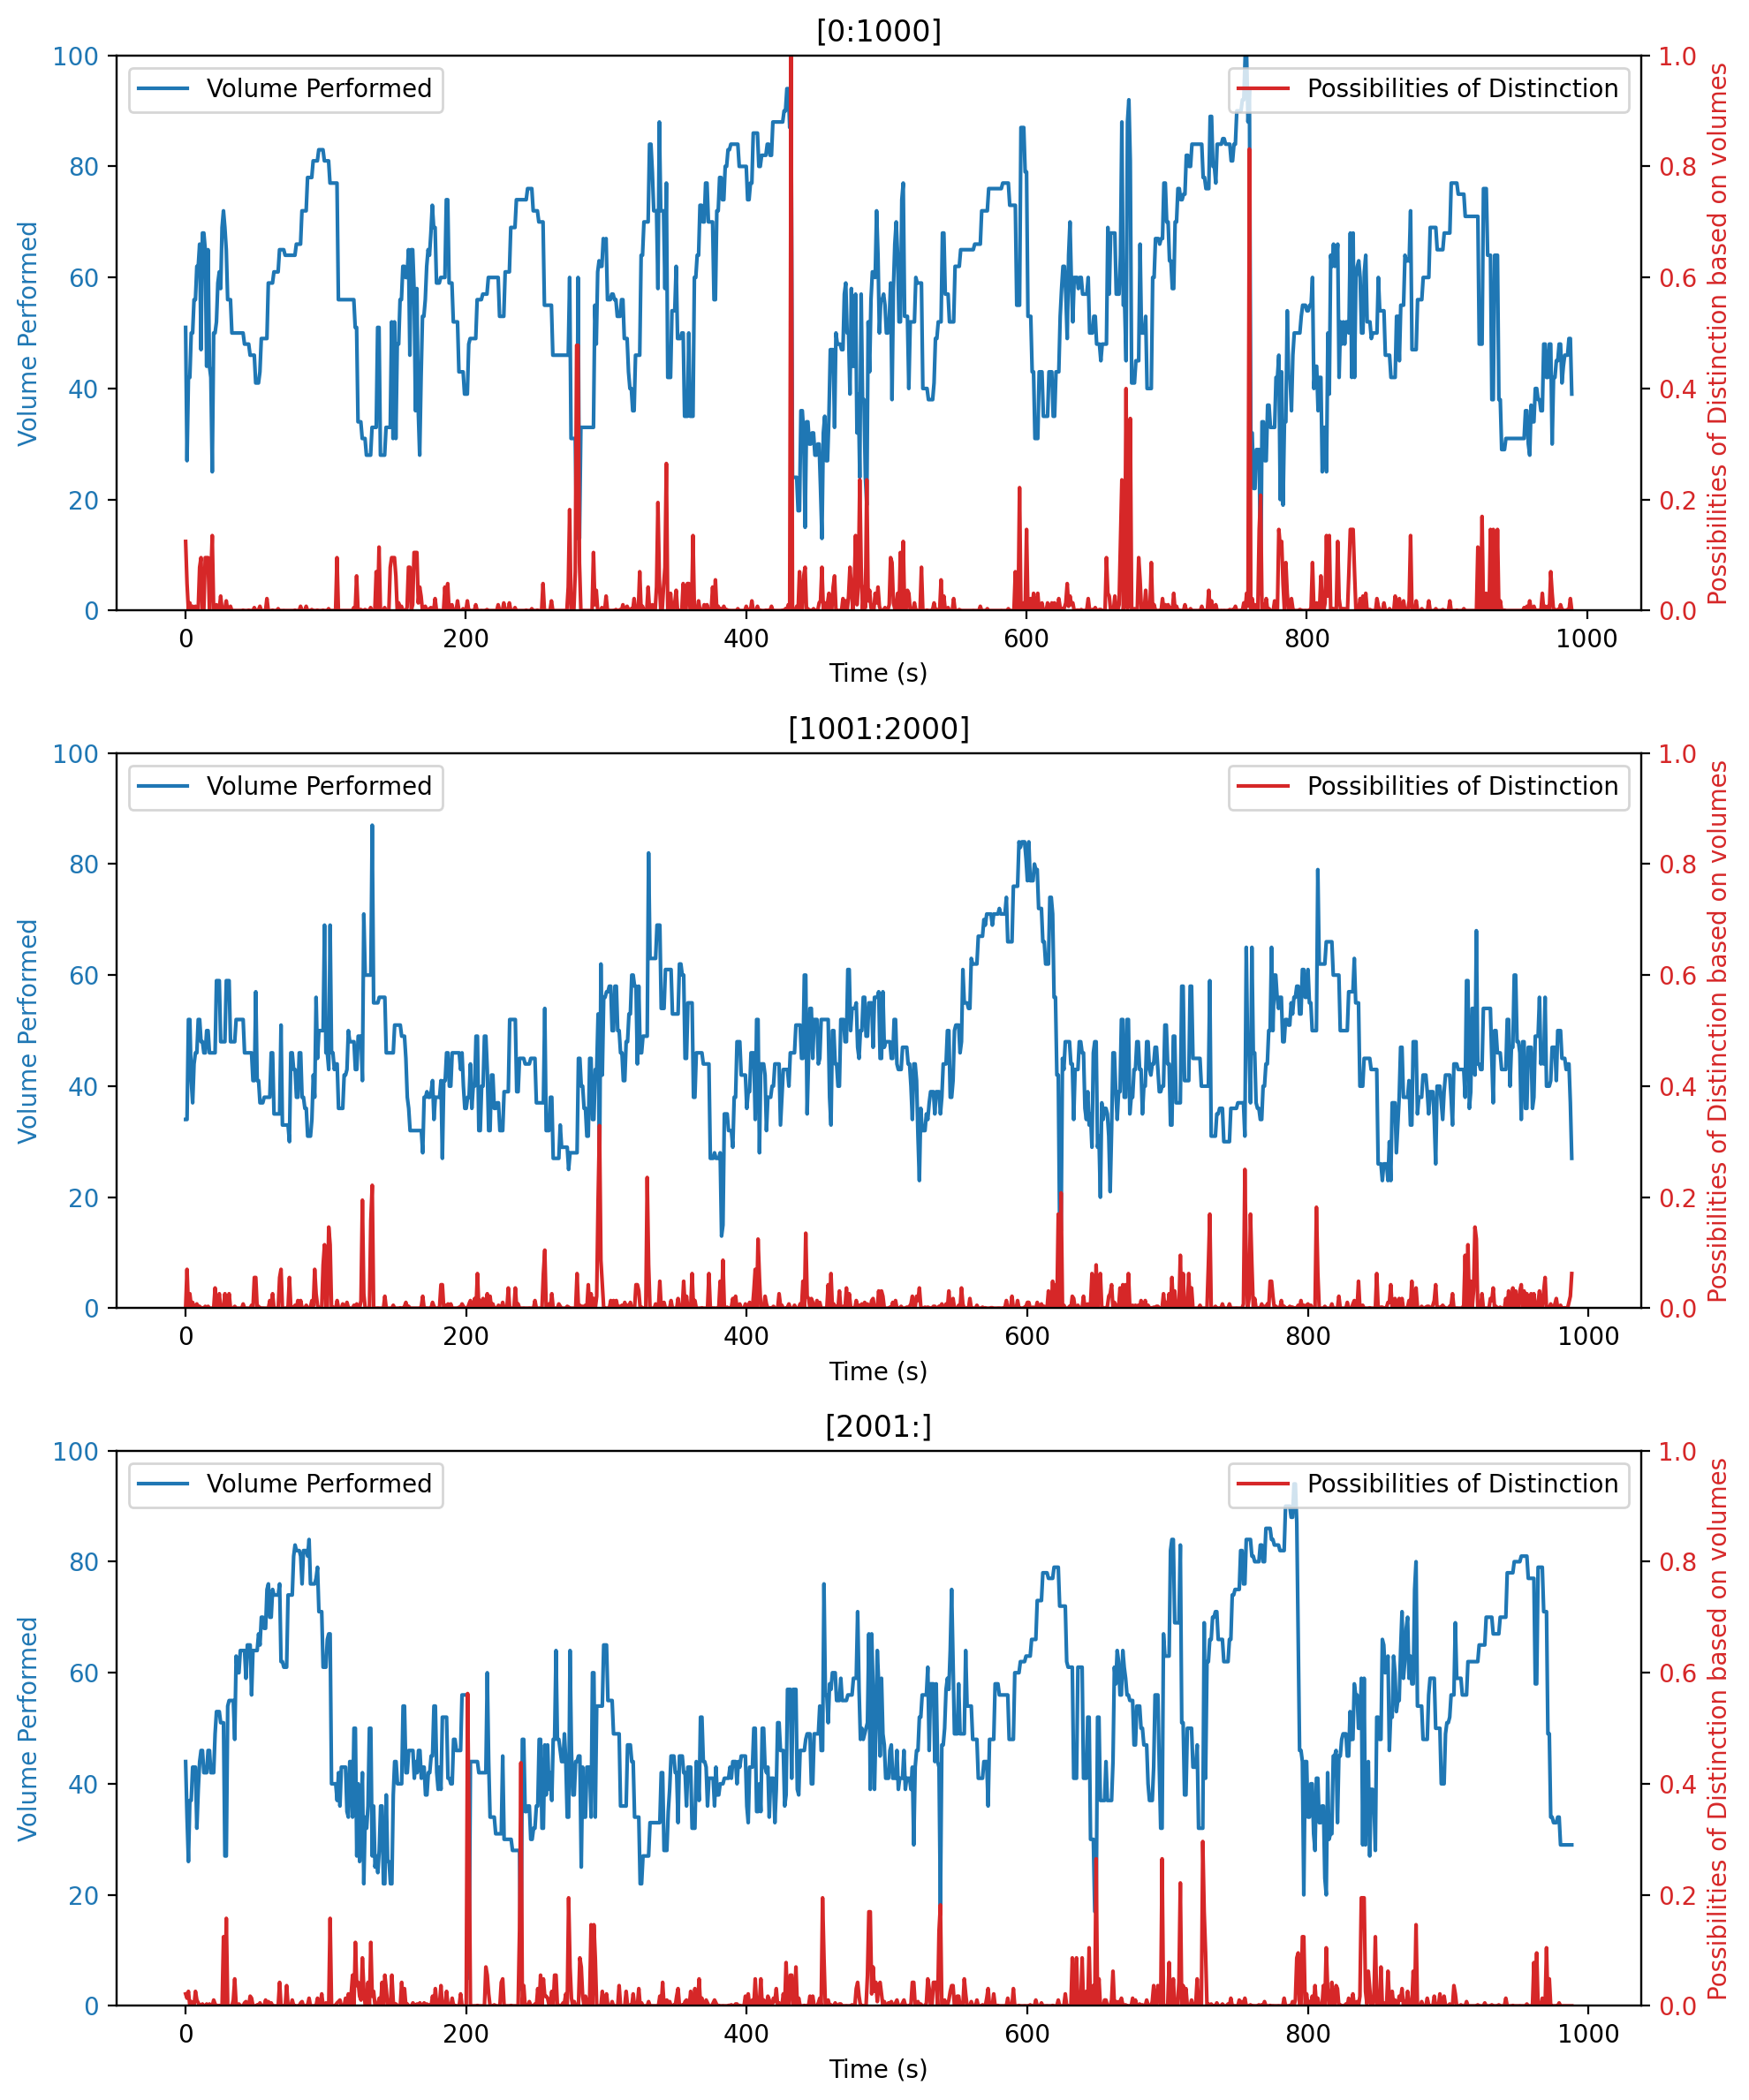

In [5]:
# MIDIファイルを読み込む
midi_file_performed = converter.parse('Moment_Musical_no_1/MunA10M.mid')
list_volume_performed = get_volume(midi_file_performed)
list_volume_differences_scaled = get_scaled_differences_in_volumes(list_volume_performed)
plot_volume_and_possibilities(list_volume_performed, list_volume_differences_scaled)

### Task C3

### Task C4